# Finding Association for Store Dataset
- Support of `1.5%`
- Confidence of `40%`
- For $T(X)$ be number of transactions containing X
## Support
$$
    Support(\{X\}\rightarrow \{Y\}) = \frac{T(X,Y)}{T(All)}
$$
## Confidence
$$
    Confidence(\{X\}\rightarrow \{Y\}) = \frac{T(X,Y)}{T(X)}
$$

In [1]:
"""
Data Mining Assignment 2 [Date: 11 Feb 21]
"""
__author__='Black D Chase'
__version__='0.3.3'

In [2]:
# Imports

x=!pip show tqdm
if 'WARNING' in x[0]:
    !pip install tqdm
from tqdm import tqdm
#For loading bar, to check if it's not stuck. For smaller values of `connectivityCount` and bigger values of n in nConnectivityCount.

x=!pip show IPython
if 'WARNING' in x[0]:
    !pip install IPython
from IPython import display
#For showing Result Image

In [3]:
store = open('store_data.csv')
pairConnectivity=[]
pairConnectivity.append({})
associations = {}

supportPer = 0.015
# Support of 1.5%

minimumSupport = int(7501*supportPer)
# Number of minimum Transaction for it to be considered (Number of trxn*supportPer)

confidencePer = 0.4
# Confidence of 40%

# Change these values to get different result according to the need

In [4]:
def nConnectivityCal(n,minimumSupport=2,debugMode=False):
    global pairConnectivity
    if n<=0:
        print(n,"very small")
        return 
    if len(pairConnectivity)<n:
        nConnectivityCal(n-1,minimumSupport)
    if len(pairConnectivity)==n:
        pairConnectivity.append({})
    if n==1:
        for i in pairConnectivity[0].keys():
            for j in pairConnectivity[0][i]:
                k = frozenset([j])
                if k not in pairConnectivity[1].keys():
                    pairConnectivity[1][k]=set()
                else:
                    pairConnectivity[1][k].add(i)
    else:
        keys = list(pairConnectivity[n-1].keys())
        kRange = []
        for i in range(len(keys)-1):
            for j in range(i+1,len(keys)):
                kRange.append([i,j])
        for i,j in tqdm(kRange):
            intersect = keys[i].intersection(keys[j])
            diff = keys[i].symmetric_difference(keys[j])
            k=frozenset(intersect.union(diff))
            if len(intersect)==n-2 and len(diff)==2:
                a = set(pairConnectivity[n-1][keys[i]])
                b = set(pairConnectivity[n-1][keys[j]])
                chkPocket = a.intersection(b)
                if len(chkPocket)>=minimumSupport:
                    pairConnectivity[n][k] = set(chkPocket)
    return pairConnectivity[n]

In [5]:
def findSupport(x,y,debugMode=False):
    global minimumSupport, supportPer,pairConnectivity
    x = frozenset(x)
    y = frozenset(y)
    z = x.union(y)
    if len(z)>len(pairConnectivity)-1:
        nConnectivityCal(len(z),minimumSupport)
    try:
        totalTransactions = len(pairConnectivity[0].keys())
        transactionXY = len(pairConnectivity[len(z)][z])
    except:
        if debugMode:
            print("No such transaction")
    # if zero - could be 0,1,2.. (less than min connectivity)
    try:
        supp=transactionXY/totalTransactions
    except:
        supp=0
        if debugMode:
            print("Total Number of transaction is 0")
    if debugMode:
        print("Support: ",supp*100,"%, where required was ",supportPer*100,"%")
        print("Acceptable") if (supp>=supportPer) else print("Not acceptable")
    return supp

In [6]:
def findConfidence(x,y,debugMode=False):
    global minimumSupport,confidencePer,pairConnectivity
    x = frozenset(x)
    y = frozenset(y)
    z = x.union(y)
    if len(z)>len(pairConnectivity)-1:
        nConnectivityCal(len(z),minimumSupport)
    try:
        transactionX = len(pairConnectivity[len(x)][x])
        transactionXY = len(pairConnectivity[len(z)][z])
    except:
        if debugMode:
            print("No such transaction")
    # if zero - could be 0,1,2.. (less than min connectivity)
    try:
        conf = transactionXY/transactionX
    except:
        conf=0
        if debugMode:
            print("Number of transaction containing ",x," is less then ",minimumSupport)
    if debugMode:
        print("Confidence: ",conf*100,"%, where required was ",confidencePer*100,"%")
        print("Acceptable") if (conf>=confidencePer) else print("Not acceptable")
    return conf

In [7]:
def updateAssociation(x,y,debugMode=False):
    global associations,supportPer,confidencePer
    a,b = set(x),set(y)
    temp = str(a) + " -> " + str(b)
    supp = findSupport(x,y)
    conf = findConfidence(x,y)
    if supp!=0:
        assoMsg = " Support= "+str(supp)+" Confidence= "+str(conf)
        if supp>=supportPer:
            assoMsg+="\n Support Acceptable"
        else:
            assoMsg+="\n Support Unacceptable"
        if conf>=confidencePer:
            assoMsg+=", Confidence Acceptable"
        else:
            assoMsg+=", Confidence Unacceptable"
        if debugMode:
            print(temp,":",assoMsg)
        associations[temp]=assoMsg
        return True
    return False

In [8]:
# Making ID's for Transactions
t=0
for i in store.readlines():
    x = i.rsplit(',')
    x[-1]=x[-1][:-1]
    # Removing '\n'
    x=set(x)
    if '' in x:
        x.remove('')
    x=frozenset(x)
    pairConnectivity[0]["TX"+str(t)]=x
    t+=1

In [28]:
type(store) is io.TextIOWrapper

NameError: name 'io' is not defined

- `pairConnectivity[0]` will save all transations with respect to thier Transation ID we just made.
- `pairConnectivity[n]` will have a dictonary, in which `Items` Is the Item set  with `n` distinguished items. This set will be mapped to set of transaction which have this item set.
`frozenset(Items)-> set(transaction(Items))`

In [9]:
nConnectivityCal(4,minimumSupport)

100%|██████████| 3/3 [00:00<00:00, 26434.69it/s]


{}

In [10]:
pairConnectivity[3]

{frozenset({'milk', 'mineral water', 'spaghetti'}): {'TX1058',
  'TX125',
  'TX1360',
  'TX140',
  'TX141',
  'TX1414',
  'TX1420',
  'TX1425',
  'TX1474',
  'TX1547',
  'TX157',
  'TX1604',
  'TX1605',
  'TX1612',
  'TX1613',
  'TX1681',
  'TX1695',
  'TX1750',
  'TX1773',
  'TX1806',
  'TX2022',
  'TX2064',
  'TX2104',
  'TX2113',
  'TX2123',
  'TX2181',
  'TX2197',
  'TX2206',
  'TX2246',
  'TX2289',
  'TX2358',
  'TX2395',
  'TX2429',
  'TX2551',
  'TX2592',
  'TX26',
  'TX2613',
  'TX2632',
  'TX2643',
  'TX2645',
  'TX2700',
  'TX2711',
  'TX2767',
  'TX2773',
  'TX2782',
  'TX2805',
  'TX2831',
  'TX2851',
  'TX2853',
  'TX3082',
  'TX3132',
  'TX3241',
  'TX3281',
  'TX3445',
  'TX3478',
  'TX3642',
  'TX3659',
  'TX3821',
  'TX3862',
  'TX4040',
  'TX4114',
  'TX412',
  'TX4148',
  'TX422',
  'TX4263',
  'TX4385',
  'TX4458',
  'TX456',
  'TX4565',
  'TX4591',
  'TX4657',
  'TX4752',
  'TX4841',
  'TX4858',
  'TX4866',
  'TX4887',
  'TX4939',
  'TX4971',
  'TX5001',
  'TX5004'

In [11]:
a = ['frozen vegetables']
b = ['mineral water'] 
# For ['frozen vegetables'] and ['mineral water']

In [12]:
findSupport(a,b,debugMode=True)

Support:  3.572856952406346 %, where required was  1.5 %
Acceptable


0.03572856952406346

In [13]:
findConfidence(a,b,debugMode=True)

Confidence:  37.53501400560224 %, where required was  40.0 %
Not acceptable


0.3753501400560224

In [14]:
c = ['olive oil', 'spaghetti']
d = ['mineral water']
# For ['frozen vegetables','milk'] and ['mineral water','shrimp']

In [15]:
findSupport(c,d,debugMode=True)

No such transaction
Total Number of transaction is 0
Support:  0 %, where required was  1.5 %
Not acceptable


0

In [16]:
findConfidence(c,d,debugMode=True)

No such transaction
Number of transaction containing  frozenset({'spaghetti', 'olive oil'})  is less then  112
Confidence:  0 %, where required was  40.0 %
Not acceptable


0

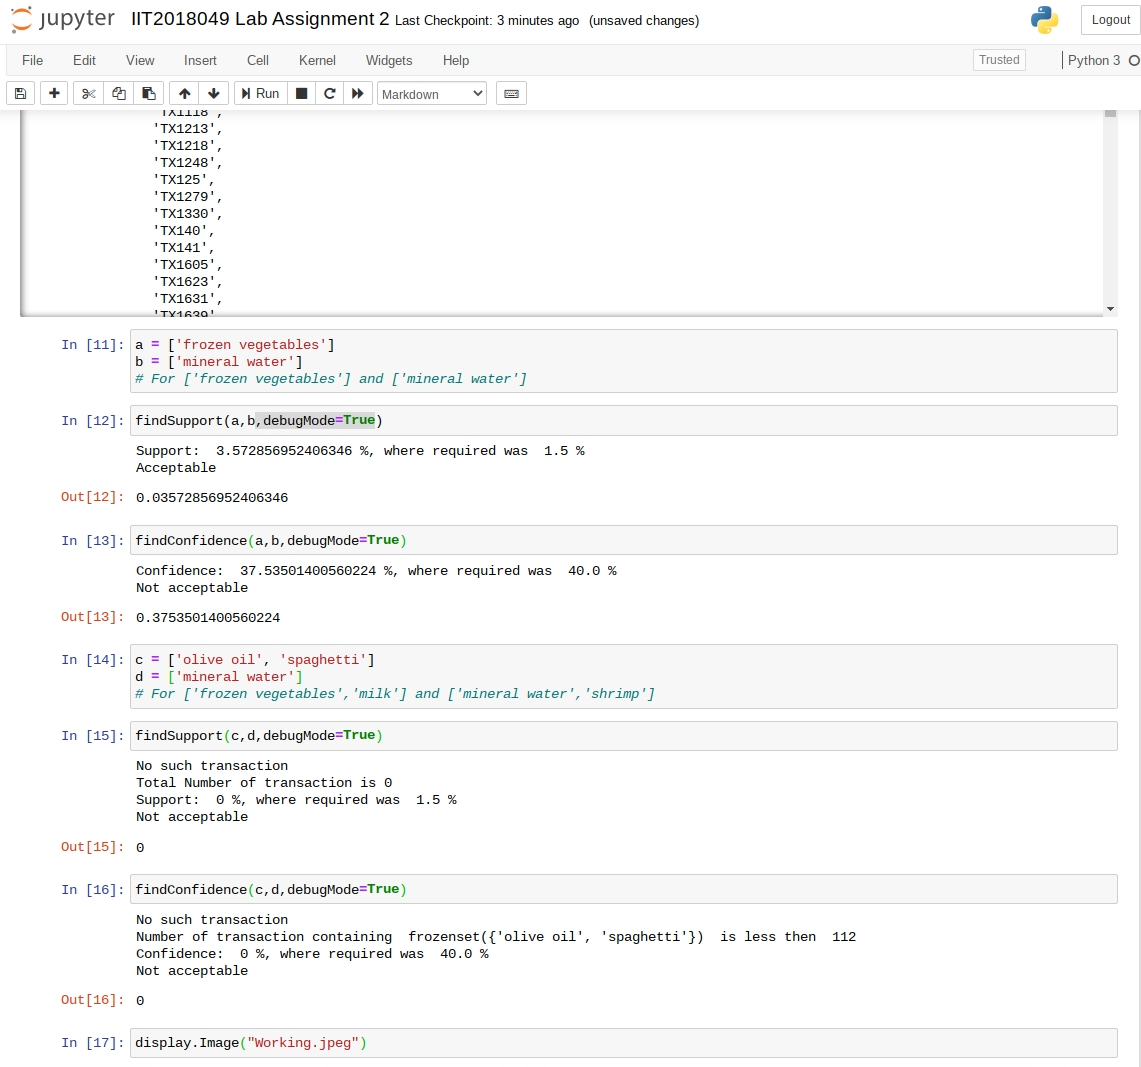

In [17]:
display.Image("Working.jpeg")

## For all the association rules in this Dataset:

In [18]:
keys_1 = list(pairConnectivity[1].keys())
keys_2 = list(pairConnectivity[2].keys())
keys_3 = list(pairConnectivity[3].keys())
# Checking Upto 3 levels

# 2-2
temp = []
for i in range(len(keys_2)):
    for j in range(i+1,len(keys_2)):
        temp.append([i,j])
for i,j in tqdm(temp):
    x,y = keys_2[i],keys_2[j]
    updateAssociation(x,y)
    updateAssociation(y,x)

# 1-1
temp = []
for i in range(len(keys_1)):
    for j in range(i+1,len(keys_1)):
        temp.append([i,j])
for i,j in tqdm(temp):
    x,y = keys_1[i],keys_1[j]
    updateAssociation(x,y)
    updateAssociation(y,x)

# 1-2
temp = []
for i in range(len(keys_2)):
    for j in range(len(keys_1)):
        temp.append([i,j])
for i,j in tqdm(temp):
    x,y = keys_2[i],keys_1[j]
    updateAssociation(y,x)
    updateAssociation(x,y)

# 3-3
temp = []
for i in range(len(keys_3)):
    for j in range(i+1,len(keys_3)):
        temp.append([i,j])
for i,j in tqdm(temp):
    x,y = keys_3[i],keys_3[j]
    updateAssociation(x,y)
    updateAssociation(y,x)

# 1-3
temp = []
for i in range(len(keys_1)):
    for j in range(len(keys_3)):
        temp.append([i,j])
for i,j in tqdm(temp):
    x,y = keys_1[i],keys_3[j]
    updateAssociation(x,y)
    updateAssociation(y,x)

# 2-3
temp = []
for i in range(len(keys_2)):
    for j in range(len(keys_3)):
        temp.append([i,j])
for i,j in tqdm(temp):
    x,y = keys_2[i],keys_3[j]
    updateAssociation(y,x)
    updateAssociation(x,y)


  0%|          | 0/267 [00:00<?, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 267/267 [00:00<00:00, 62205.14it/s]


In [19]:
associations

{"{'mineral water', 'milk'} -> {'spaghetti', 'mineral water'}": ' Support= 0.01573123583522197 Confidence= 0.3286908077994429\n Support Acceptable, Confidence Unacceptable',
 "{'spaghetti', 'mineral water'} -> {'mineral water', 'milk'}": ' Support= 0.01573123583522197 Confidence= 0.26339285714285715\n Support Acceptable, Confidence Unacceptable',
 "{'mineral water', 'milk'} -> {'spaghetti', 'milk'}": ' Support= 0.01573123583522197 Confidence= 0.3286908077994429\n Support Acceptable, Confidence Unacceptable',
 "{'spaghetti', 'milk'} -> {'mineral water', 'milk'}": ' Support= 0.01573123583522197 Confidence= 0.44360902255639095\n Support Acceptable, Confidence Acceptable',
 "{'spaghetti', 'mineral water'} -> {'mineral water', 'chocolate'}": ' Support= 0.01586455139314758 Confidence= 0.265625\n Support Acceptable, Confidence Unacceptable',
 "{'mineral water', 'chocolate'} -> {'spaghetti', 'mineral water'}": ' Support= 0.01586455139314758 Confidence= 0.3012658227848101\n Support Acceptable, 

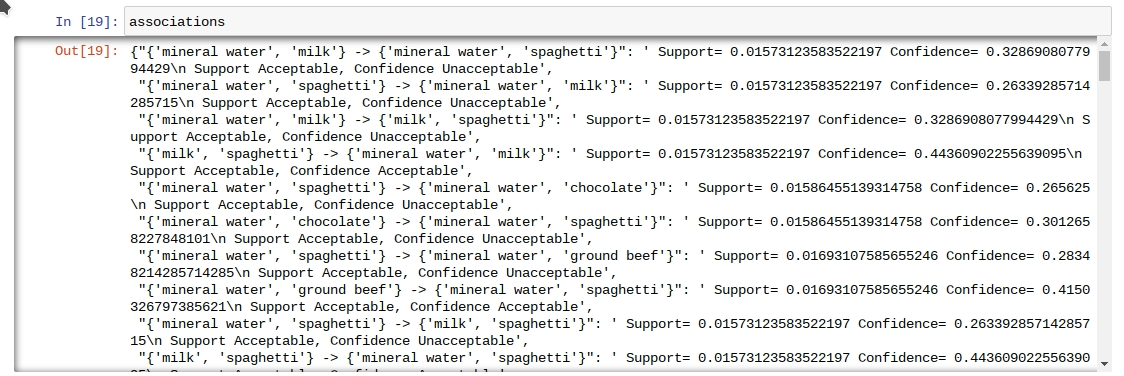

In [20]:
display.Image("Result.jpeg")